In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
pulsar_data <- read_csv("https://raw.githubusercontent.com/rchanpra/dsci100_group_project/main/HTRU2/HTRU_2.csv", col_names = FALSE)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
colnames(pulsar_data) <- c("mean_profile",
                           "deviation_profile",
                           "kurtosis_profile",
                           "skewness_profile",
                           "mean_dmsnr",
                           "deviation_dmsnr",
                           "kurtosis_dmsnr",
                           "skewness_dmsnr",
                           "class")

In [4]:
pulsar_data <- pulsar_data |>
    mutate(class = ifelse(class == 1, "pulsar", "not_pulsar"))

In [5]:
pulsar_data <- pulsar_data |>
    mutate(class = as_factor(class))

In [6]:
pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)

In [7]:
pulsar_train |> is.na() |> sum()

[1] 0

In [8]:
pulsar_train |> summary()

  mean_profile     deviation_profile kurtosis_profile   skewness_profile 
 Min.   :  6.188   Min.   :24.77     Min.   :-1.87601   Min.   :-1.7647  
 1st Qu.:100.930   1st Qu.:42.40     1st Qu.: 0.02656   1st Qu.:-0.1946  
 Median :115.008   Median :47.00     Median : 0.22316   Median : 0.1946  
 Mean   :111.136   Mean   :46.60     Mean   : 0.47207   Mean   : 1.7257  
 3rd Qu.:127.078   3rd Qu.:51.09     3rd Qu.: 0.47193   3rd Qu.: 0.9223  
 Max.   :192.617   Max.   :98.78     Max.   : 8.06952   Max.   :68.1016  
   mean_dmsnr       deviation_dmsnr  kurtosis_dmsnr   skewness_dmsnr    
 Min.   :  0.2132   Min.   :  7.37   Min.   :-3.139   Min.   :  -1.949  
 1st Qu.:  1.9256   1st Qu.: 14.43   1st Qu.: 5.760   1st Qu.:  34.666  
 Median :  2.7960   Median : 18.46   Median : 8.433   Median :  83.055  
 Mean   : 12.5882   Mean   : 26.32   Mean   : 8.300   Mean   : 104.746  
 3rd Qu.:  5.4983   3rd Qu.: 28.58   3rd Qu.:10.696   3rd Qu.: 139.059  
 Max.   :223.3921   Max.   :109.66   Max.   

In [9]:
mean_profile_plot <- pulsar_train |>
        ggplot(aes(x = class, y = mean_profile, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$mean_profile), linetype = "dashed") +
        labs(x = "Class", y = "Mean of the integrated profile", fill = "Class") +
        theme(text = element_text(size = 15))

deviation_profile_plot <- pulsar_train |>
        ggplot(aes(x = class, y = deviation_profile, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$deviation_profile), linetype = "dashed") +
        labs(x = "Class", y = "Standard deviation of the integrated profile", fill = "Class") +
        theme(text = element_text(size = 15))

kurtosis_profile_plot <- pulsar_train |>
        ggplot(aes(x = class, y = kurtosis_profile, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$kurtosis_profile), linetype = "dashed") +
        labs(x = "Class", y = "Excess kurtosis of the integrated profile", fill = "Class") +
        theme(text = element_text(size = 15))

skewness_profile_plot <- pulsar_train |>
        ggplot(aes(x = class, y = skewness_profile, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$skewness_profile), linetype = "dashed") +
        labs(x = "Class", y = "Skewness of the integrated profile", fill = "Class") +
        theme(text = element_text(size = 15))

mean_dmsnr_plot <- pulsar_train |>
        ggplot(aes(x = class, y = mean_dmsnr, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$mean_dmsnr), linetype = "dashed") +
        labs(x = "Class", y = "Mean of the DM-SNR curve", fill = "Class") +
        theme(text = element_text(size = 15))

deviation_dmsnr_plot <- pulsar_train |>
        ggplot(aes(x = class, y = deviation_dmsnr, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$deviation_dmsnr), linetype = "dashed") +
        labs(x = "Class", y = "Standard deviation of the DM-SNR curve", fill = "Class") +
        theme(text = element_text(size = 15))

kurtosis_dmsnr_plot <- pulsar_train |>
        ggplot(aes(x = class, y = kurtosis_dmsnr, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$kurtosis_dmsnr), linetype = "dashed") +
        labs(x = "Class", y = "Excess kurtosis of the DM-SNR curve", fill = "Class") +
        theme(text = element_text(size = 15))

skewness_dmsnr_plot <- pulsar_train |>
        ggplot(aes(x = class, y = skewness_dmsnr, fill = class)) +
        geom_violin() +
        geom_boxplot(width = 0.1, alpha = 0.5) +
        geom_hline(yintercept = mean(pulsar_train$skewness_dmsnr), linetype = "dashed") +
        labs(x = "Class", y = "Skewness of the DM-SNR curve", fill = "Class") +
        theme(text = element_text(size = 15))

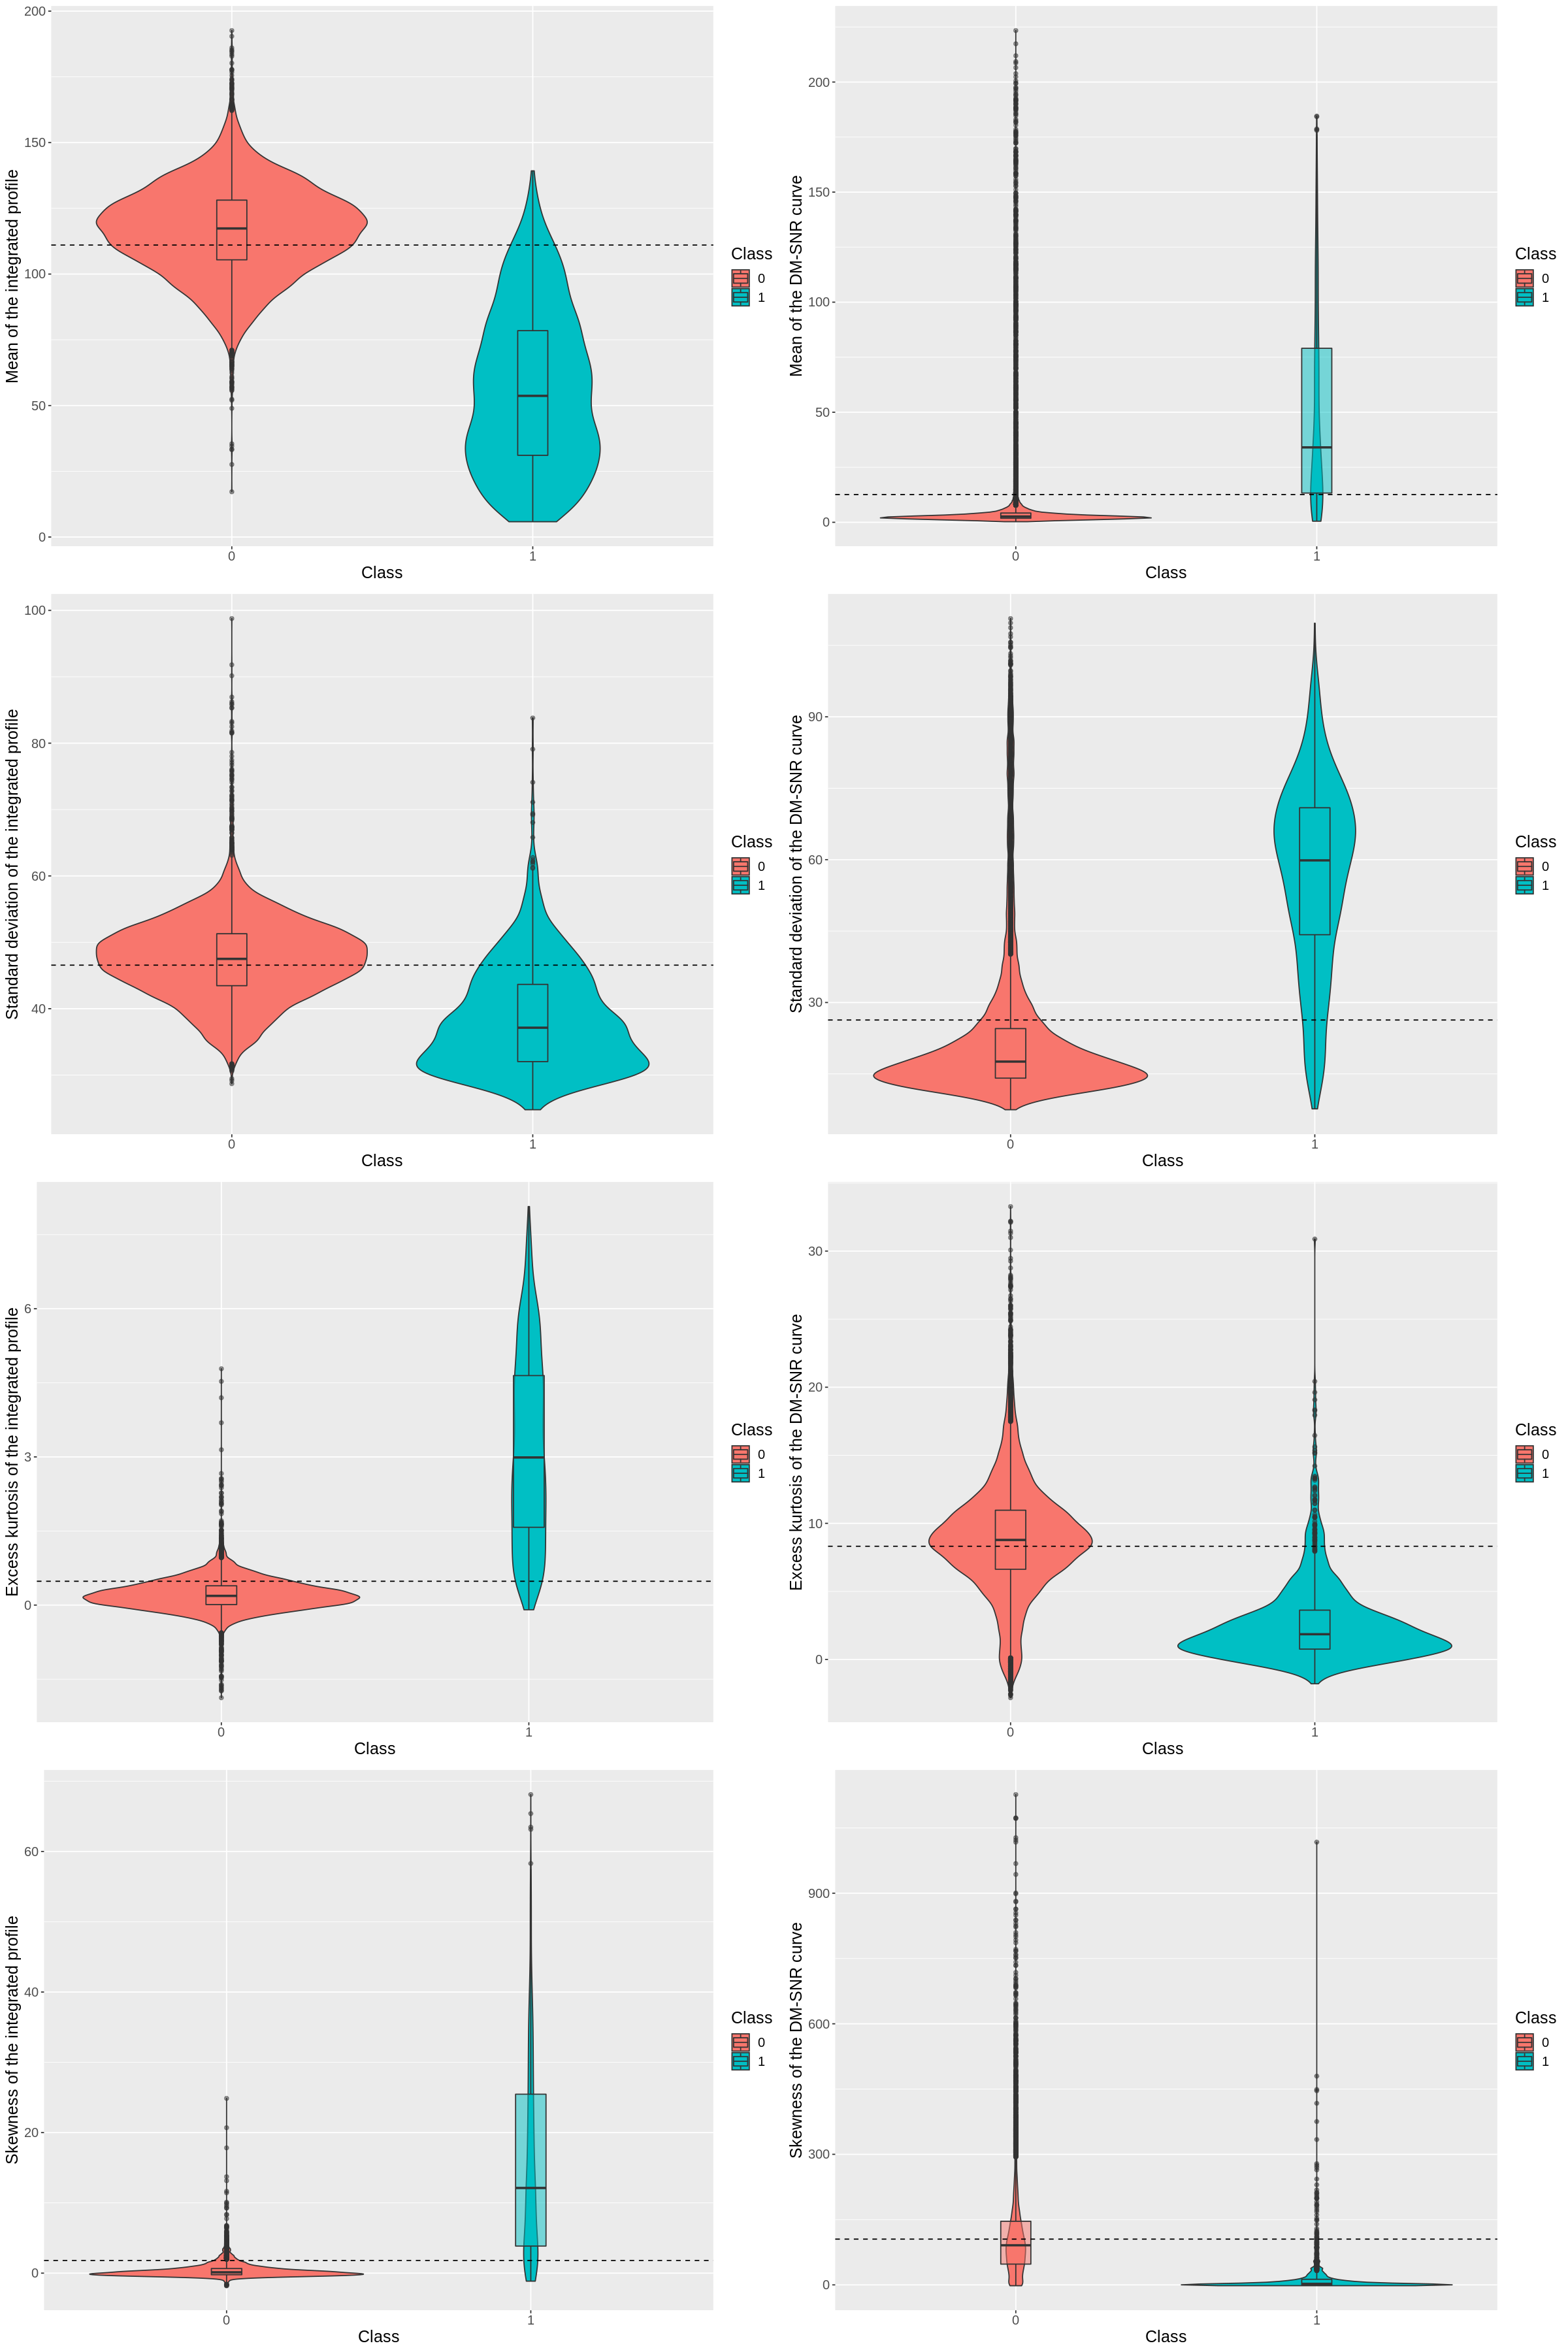

In [10]:
options(repr.plot.width = 20, repr.plot.height = 30)

plot_grid(mean_profile_plot,
          mean_dmsnr_plot,
          deviation_profile_plot,
          deviation_dmsnr_plot,
          kurtosis_profile_plot,
          kurtosis_dmsnr_plot,
          skewness_profile_plot,
          skewness_dmsnr_plot,
          ncol = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



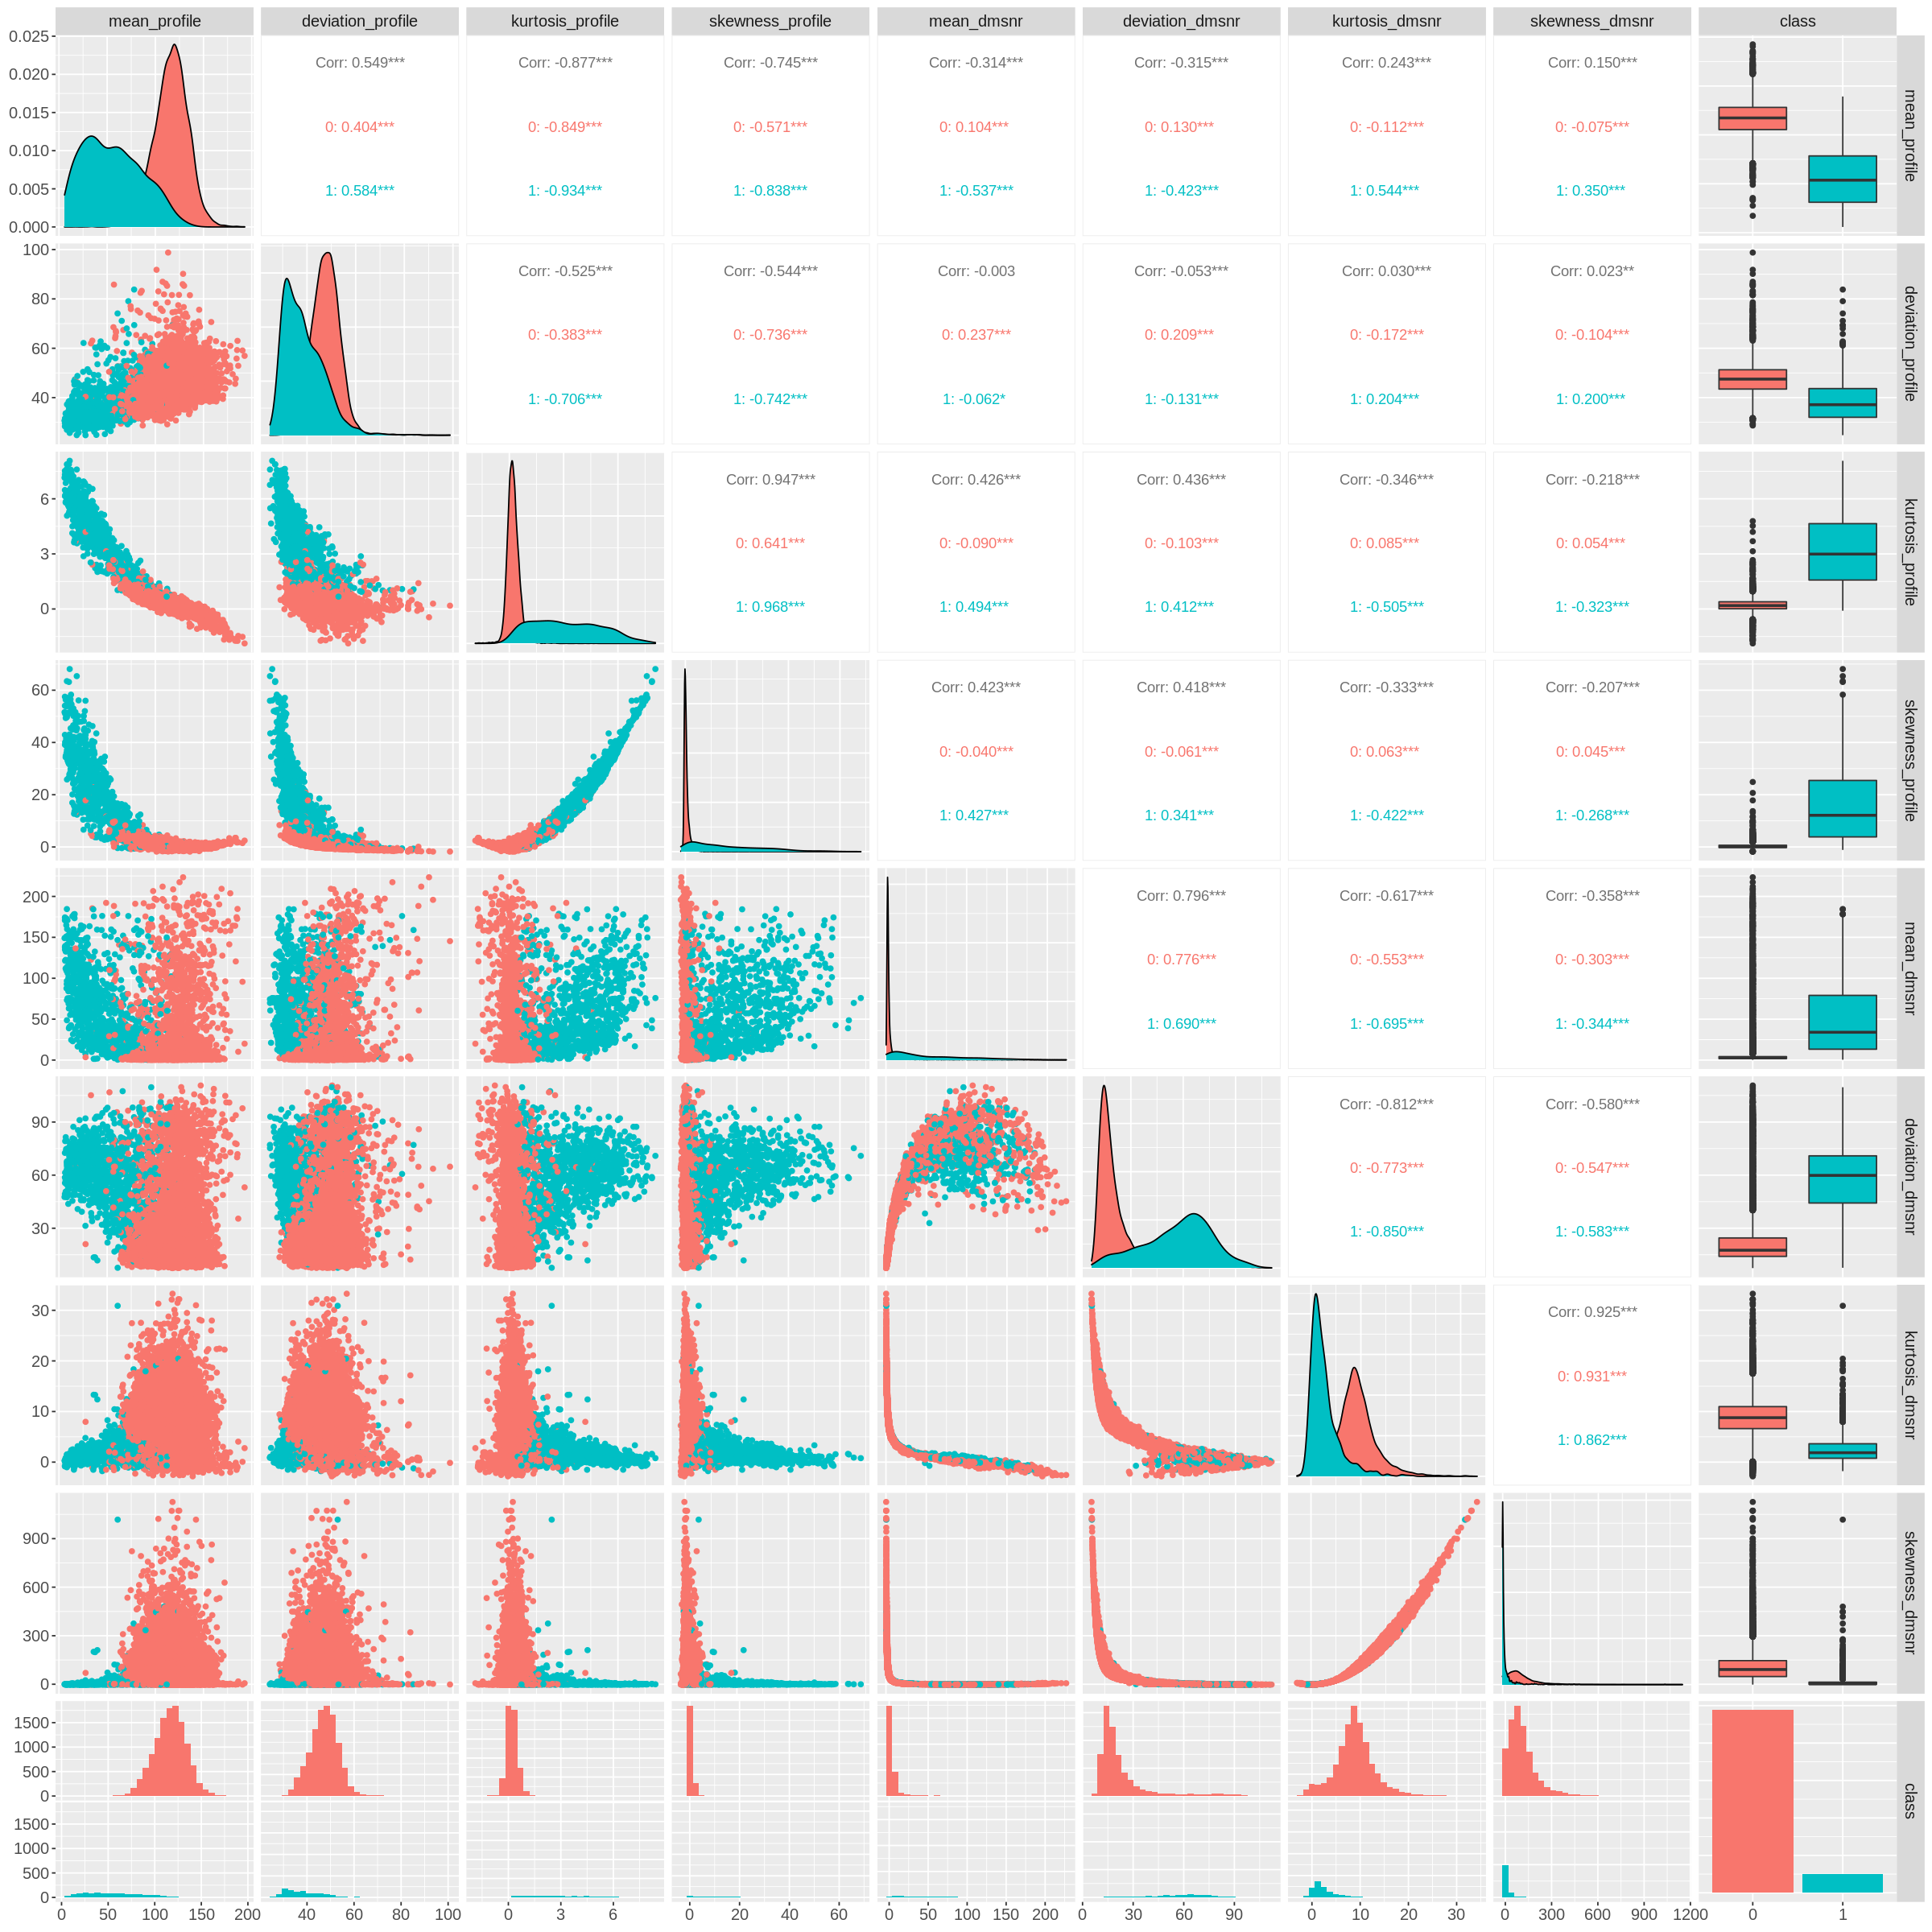

In [11]:
options(repr.plot.width = 20, repr.plot.height = 20)

pulsar_train |> ggpairs(aes(color = class)) +
    theme(text = element_text(size = 15))